## Bayesian Classification
### By Team 29 - Abhigyan Chattopadhyay (EE19B146), Nihal John George (EE19B131)

In [193]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
# Path constants
data_path = './Data/'
team_num = '29'
pr_type = 'linsep'

total_path = data_path+team_num+'-'+pr_type+'/'

In [195]:
# Load data
train = pd.read_csv(total_path+'trian.txt', header=None, names=['x1', 'x2', 'y'])
dev = pd.read_csv(total_path+'dev.txt', header=None, names=['x1', 'x2', 'y'])

train.head()

,x1,x2,y
0,2.7092,3.1619,1
1,1.7126,5.1063,1
2,3.4792,5.0759,1
3,1.5750,1.7354,1
4,2.6529,4.9581,1


In [196]:
X_train = train.iloc[:,:2].to_numpy()
y_train = train.iloc[:,2].to_numpy()

X_dev = dev.iloc[:,:2].to_numpy()
y_dev = dev.iloc[:,2].to_numpy()

In [197]:
# Bayes with Cov diff for all classes
# 
# For each class i, find the 2x2 cov matrix of x1 and x2
# cov_i = [[Ex1x1, Ex1x2], 
#        [Ex2x1, Ex2x2]]
# Find expectations from dataset by doing average of those 
# products over examples with y = i. This is MLE of cov given unimodal Gaussian assumption
# Now need to find mean meu vector for each class. 
# Find average of x1s and x2s for each class, this is MLE of mean
# given unimodal Gaussian assumption

# Now with mean and cov for each class, we can form classifier.
# Equations of discriminant functions for different cases given in Duda (2001) Ch 2, pg 19

# Case 1: Bayes with same cov for all classes - Find cov matrix without considering class
# Case 2: Bayes with diff cov - Discussed above
# Case 3: Naive Bayes with cov = sigma^2 I - Find variance of all feature values, across features.
# Case 4: Naive Bayes with cov same for all classes - cov matrix is diagonal (since naive), but diagonal values could be different. So find variance of x1, find variance of x2
# Case 5: Naive Bayes with cov diff for all classes - cov matrix is diagonal (since naive), but diagonal values could be diff, and the matrix is diff for each class

# Expected results
# Case 1: Hyperplane
# Case 2: Hyperquadratic
# Case 3: Hyperplane
# Case 4: Hyperplane
# Case 5: Hyperquadratic

In [198]:
# Finding mean and covariance of X in each class manually

cl_counts = [0,0,0]
x1_sums = [0,0,0]
x2_sums = [0,0,0]
x1sq_sums = [0,0,0]
x2sq_sums = [0,0,0]
x1x2_sums = [0,0,0]
m = X_train.shape[0]

for i in range(m):
    cl_ind = y_train[i]-1
    x1_here = X_train[i,0]
    x2_here = X_train[i,1]

    cl_counts[cl_ind] += 1
    x1_sums[cl_ind] += x1_here
    x2_sums[cl_ind] += x2_here
    x1sq_sums[cl_ind] += x1_here ** 2
    x2sq_sums[cl_ind] += x2_here ** 2
    x1x2_sums[cl_ind] += x1_here * x2_here
    
x1_means = [x1_sums[i]/cl_counts[i] for i in range(3)]
x2_means = [x2_sums[i]/cl_counts[i] for i in range(3)]
x1_mean_total = sum(x1_sums)/m
x2_mean_total = sum(x2_sums)/m

xall_mean = (sum(x1_sums)+sum(x2_sums))/(2*m)

x1_vars = [x1sq_sums[i]/cl_counts[i] - (x1_means[i]**2) for i in range(3)]
x2_vars = [x2sq_sums[i]/cl_counts[i] - (x2_means[i]**2) for i in range(3)]
x1x2_covars = [x1x2_sums[i]/cl_counts[i] - x1_means[i]*x2_means[i] for i in range(3)]

xall_var = (sum(x1sq_sums)+sum(x2sq_sums))/(2*m) - (xall_mean**2)
x1_var_total = sum(x1sq_sums)/m - (x1_mean_total**2) 
x2_var_total = sum(x2sq_sums)/m - (x2_mean_total**2) 
x1x2_covar_total = sum(x1x2_sums)/m - (x1_mean_total*x2_mean_total)

In [199]:
# Set mean vec and cov matrices for the 5 cases

x_means_vecs = [np.array([x1_means[i], x2_means[i]]) for i in range(3)]

cov_1 = np.array([[x1_var_total, x1x2_covar_total], [x1x2_covar_total, x2_var_total]])

cov_2_lst = [np.array([[x1_vars[i], x1x2_covars[i]], [x1x2_covars[i], x2_vars[i]]]) for i in range(3)]

cov_3 = np.array([[xall_var, 0], [0, xall_var]])

cov_4 = np.array([[x1_var_total, 0], [0, x2_var_total]])

cov_5_lst = [np.array([[x1_vars[i], 0], [0, x2_vars[i]]]) for i in range(3)]

print("x1_means:", x1_means)
print("x2_means:", x2_means)
print("x1_mean_total:", x1_mean_total)
print("x2_mean_total:", x2_mean_total)
print("xall_mean:", xall_mean)
print("cov_1:\n", cov_1)
print("cov_2_lst:\n", cov_2_lst)
print("cov_3:\n", cov_3)
print("cov_4:\n", cov_4)
print("cov_5_lst:\n", cov_5_lst)

x1_means: [1.846125076285716, 14.652934285714286, -0.17377046628571421]
x2_means: [2.9814346857142846, 8.920129142857142, 13.101372571428575]
x1_mean_total: 5.441762965238096
x2_mean_total: 8.334312133333334
xall_mean: 6.888037549285715
cov_1:
 [[45.49158509 -0.17019155]
 [-0.17019155 19.98804001]]
cov_2_lst:
 [array([[2.41497733, 0.42006489],
       [0.42006489, 2.88927743]]), array([[2.21717864, 0.69434338],
       [0.69434338, 2.99535214]]), array([[2.53409464, 0.50153455],
       [0.50153455, 2.35814669]])]
cov_3:
 [[34.83152272  0.        ]
 [ 0.         34.83152272]]
cov_4:
 [[45.49158509  0.        ]
 [ 0.         19.98804001]]
cov_5_lst:
 [array([[2.41497733, 0.        ],
       [0.        , 2.88927743]]), array([[2.21717864, 0.        ],
       [0.        , 2.99535214]]), array([[2.53409464, 0.        ],
       [0.        , 2.35814669]])]


In [200]:
# Define PDF class

class PDF:
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
        self.cov_det = cov[0,0]*cov[1,1] - cov[1,0]*cov[0,1]
        self.cov_det_sqrt_inv = 1/(self.cov_det ** 0.5)
        self.cov_inv = np.array([[cov[1,1], -cov[0,1]], [-cov[1,0], cov[0,0]]])/self.cov_det
        self.two_pi_inv = 1/(2*np.pi)
        
    def p(self, x):
        return self.two_pi_inv * self.cov_det_sqrt_inv * np.exp(-0.5*(x-self.mean).T @ self.cov_inv @ (x-self.mean))
        

In [201]:
# Create PDF instances
pdf_1_lst = [PDF(x_means_vecs[i], cov_1) for i in range(3)]

pdf_2_lst = [PDF(x_means_vecs[i], cov_2_lst[i]) for i in range(3)]

pdf_3_lst = [PDF(x_means_vecs[i], cov_3) for i in range(3)]

pdf_4_lst = [PDF(x_means_vecs[i], cov_4) for i in range(3)]

pdf_5_lst = [PDF(x_means_vecs[i], cov_5_lst[i]) for i in range(3)]

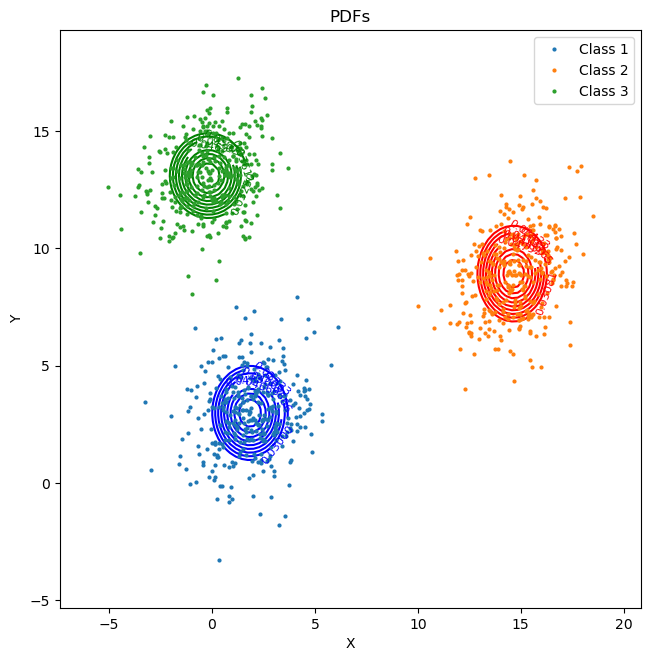

In [287]:
# Plot PDFs of each class for 5 cases, constant density curves and eigenvectors (plots #1,#3 in QP)
#TODO
prefs = [0, cl_counts[0], cl_counts[0]+cl_counts[1], cl_counts[0]+cl_counts[1]+cl_counts[2]]
X_train_classwise = [X_train[prefs[i]:prefs[i+1], :] for i in range(3)]

# plt.figure()
fig = plt.figure(figsize=(7.5,7.5))
for i in range(3):
    plt.plot(X_train_classwise[i][:,0], X_train_classwise[i][:,1], 'o', ms=2)
plt.title("Train Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["Class 1", "Class 2", "Class 3"])
# plt.show()


delta_x1 = (max(X_train[:,0] - min(X_train[:,0])))/10
delta_x2 = (max(X_train[:,1] - min(X_train[:,1])))/10

x1_min = min(X_train[:, 0]) - delta_x1
x2_min = min(X_train[:, 1]) - delta_x2

x1_max = max(X_train[:, 0]) + delta_x1
x2_max = max(X_train[:, 1]) + delta_x2

x1_pts = np.linspace(x1_min, x1_max, 100)
x2_pts = np.linspace(x2_min, x2_max, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_pts, x2_pts)


plt.title('PDFs')

# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca()
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
class_colors = ['blue', 'red', 'green']
for class_here in range(3):
    z_pts = np.array([pdf_5_lst[class_here].p(np.array([i,j])) for i,j in zip(np.ravel(x1_mesh), np.ravel(x2_mesh))])
    z_mesh = z_pts.reshape(x1_mesh.shape)
    # print(z_mesh)
    # cfset = ax.contourf(x1_mesh, x2_mesh, z_mesh, cmap='coolwarm')
    # ax.imshow(np.rot90(z_mesh), cmap='coolwarm', extent=[x1_min, x1_max, x2_min, x2_max])
    cset = ax.contour(x1_mesh, x2_mesh, z_mesh, colors=class_colors[class_here], levels = np.linspace(np.max(z_mesh)/2,np.max(z_mesh), 10))
    ax.clabel(cset, fontsize=8, colors=class_colors[class_here])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    # ax.plot_surface(x1_mesh, x2_mesh, z_mesh)
    # ax.set_xlabel('x1')
    # ax.set_ylabel('x2')
    # ax.set_zlabel('f([x1,x2])')

plt.show()

In [289]:
# Apply Bayes rule, get classifier. Takes an input vector, returns predicted class

def predict(x, pdf_lst):
    priors = [1/3, 1/3, 1/3]
    likes = [pdf_lst[i].p(x) for i in range(3)]
    numer = [likes[i]*priors[i] for i in range(3)]
    evid = sum(numer)
    posts = np.array([numer[i]/evid for i in range(3)])

    class_pred = np.argmax(posts) + 1
    confidence = np.max(posts)

    return class_pred, confidence

In [290]:
# Sanity check predict function
predict(np.array([0,13]), pdf_5_lst)

(3, 0.9999999868213659)

In [205]:
# Discriminant functions for 5 cases
#TODO


In [206]:
# Plot discriminant functions for 5 cases (plot #2 in QP)
#TODO

In [207]:
# Predict on Train and Dev Set

cases = [pdf_1_lst, pdf_2_lst, pdf_3_lst, pdf_4_lst, pdf_5_lst]
m_dev = X_dev.shape[0]
conf_mat_lst = []
conf_mat_train_lst = []
for pdf_lst_here in cases:
    conf_mat = np.zeros([3,3])
    
    for i in range(m_dev):
        class_pred = predict(X_dev[i], pdf_lst_here)
        class_true = y_dev[i]
        conf_mat[class_true-1, class_pred-1] += 1

    conf_mat_lst.append(conf_mat.copy())

    conf_mat_train = np.zeros([3,3])
    for i in range(m):
        class_pred = predict(X_train[i], pdf_lst_here)
        class_true = y_train[i]
        conf_mat_train[class_true-1, class_pred-1] += 1
    conf_mat_train_lst.append(conf_mat_train.copy())

print("Train Confusion ---")
for i in range(5):
    print(conf_mat_train_lst[i])

print("\nDev Confusion ---")
for i in range(5):
    print(conf_mat_lst[i])

Train Confusion ---
[[350.   0.   0.]
 [  0. 350.   0.]
 [  0.   0. 350.]]
[[350.   0.   0.]
 [  0. 350.   0.]
 [  0.   0. 350.]]
[[350.   0.   0.]
 [  0. 350.   0.]
 [  0.   0. 350.]]
[[350.   0.   0.]
 [  0. 350.   0.]
 [  0.   0. 350.]]
[[350.   0.   0.]
 [  0. 350.   0.]
 [  0.   0. 350.]]

Dev Confusion ---
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


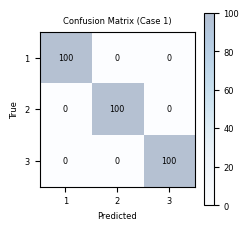

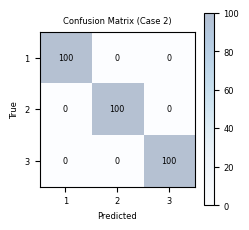

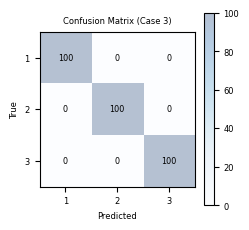

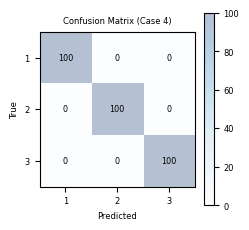

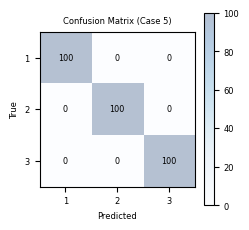

In [208]:
# Dev set confusion matrix for 5 cases (plot #4 in QP)
#TODO

for case in range(5):
    conf_mat = conf_mat_lst[case]
    fig = plt.figure(figsize=(2.5,2.5))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3, 
                    interpolation='nearest')

    width, height = conf_mat.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(int(conf_mat[x][y])), xy=(y, x), ha='center', va='center', size='xx-small')

    cb = fig.colorbar(res)
    cb.ax.tick_params(labelsize=6)
    plt.xticks(range(width), range(1,width+1), fontsize=6)
    plt.yticks(range(height), range(1,width+1), fontsize=6)
    plt.xlabel('Predicted', fontsize=6)
    plt.ylabel('True', fontsize=6)
    plt.title("Confusion Matrix (Case " + str(case+1) + ")", fontsize=6)
    plt.show()
    # plt.savefig('confusion_matrix.png', format='png')

In [209]:
# ROC, DET curves for 5 cases in 1 plot (plot #5 in QP)
#TODO

